<a href="https://colab.research.google.com/github/Sreejith-CG/Machine-Learning/blob/main/global_cost_of_living_KNN%2CSVM%2CNAVIVE_BAYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
df=pd.read_csv("/content/cost-of-living.csv")
df

,Unnamed: 0,city,country,x1,x2,x3,x4,x5,x6,x7,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,0.0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48,...,36.26,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35,7.96,1.0
1,1.0,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,...,121.19,1080.07,564.30,2972.57,1532.23,17333.09,9174.88,1382.83,5.01,1.0
2,2.0,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59,...,80.32,482.85,270.15,1117.69,584.37,2694.05,1269.44,483.19,9.15,1.0
3,3.0,Manila,Philippines,3.54,27.40,3.54,1.24,1.90,2.91,0.93,...,61.82,559.52,281.78,1754.40,684.81,3536.04,2596.44,419.02,7.80,1.0
4,4.0,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46,...,108.30,809.83,583.60,2621.05,1683.74,21847.94,10832.90,2672.23,3.47,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6215,4869.0,Peterborough,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6216,4870.0,Georgetown,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6217,4871.0,Ixtapa Zihuatanejo,Mexico,5.19,31.13,12.97,0.99,NaN,1.82,0.62,...,103.78,415.11,259.44,518.89,415.11,NaN,NaN,NaN,NaN,0.0
6218,4872.0,Iqaluit,Canada,29.78,74.61,13.77,6.70,8.93,3.72,3.54,...,NaN,NaN,NaN,2978.11,2978.11,NaN,NaN,NaN,6.53,0.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'city', 'country', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6',
       'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16',
       'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26',
       'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36',
       'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46',
       'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55',
       'data_quality'],
      dtype='object')

In [ ]:
imputer=SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
df2

,Unnamed: 0,city,country,x1,x2,x3,x4,x5,x6,x7,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,0.0,Delhi,India,4.9,22.04,4.28,1.84,3.67,1.78,0.48,...,36.26,223.87,133.38,596.16,325.82,2619.46,1068.9,586.35,7.96,1.0
1,1.0,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,...,121.19,1080.07,564.3,2972.57,1532.23,17333.09,9174.88,1382.83,5.01,1.0
2,2.0,Jakarta,Indonesia,2.54,22.25,3.5,2.02,3.18,2.19,0.59,...,80.32,482.85,270.15,1117.69,584.37,2694.05,1269.44,483.19,9.15,1.0
3,3.0,Manila,Philippines,3.54,27.4,3.54,1.24,1.9,2.91,0.93,...,61.82,559.52,281.78,1754.4,684.81,3536.04,2596.44,419.02,7.8,1.0
4,4.0,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46,...,108.3,809.83,583.6,2621.05,1683.74,21847.94,10832.9,2672.23,3.47,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6215,4869.0,Peterborough,Australia,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,...,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,0.0
6216,4870.0,Georgetown,Australia,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,...,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,0.0
6217,4871.0,Ixtapa Zihuatanejo,Mexico,5.19,31.13,12.97,0.99,missing_value,1.82,0.62,...,103.78,415.11,259.44,518.89,415.11,missing_value,missing_value,missing_value,missing_value,0.0
6218,4872.0,Iqaluit,Canada,29.78,74.61,13.77,6.7,8.93,3.72,3.54,...,missing_value,missing_value,missing_value,2978.11,2978.11,missing_value,missing_value,missing_value,6.53,0.0


In [ ]:
df2.replace({'missing_value':0},inplace=True)
df2

,Unnamed: 0,city,country,x1,x2,x3,x4,x5,x6,x7,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,0.0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48,...,36.26,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35,7.96,1.0
1,1.0,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,...,121.19,1080.07,564.30,2972.57,1532.23,17333.09,9174.88,1382.83,5.01,1.0
2,2.0,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59,...,80.32,482.85,270.15,1117.69,584.37,2694.05,1269.44,483.19,9.15,1.0
3,3.0,Manila,Philippines,3.54,27.40,3.54,1.24,1.90,2.91,0.93,...,61.82,559.52,281.78,1754.40,684.81,3536.04,2596.44,419.02,7.80,1.0
4,4.0,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46,...,108.30,809.83,583.60,2621.05,1683.74,21847.94,10832.90,2672.23,3.47,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6215,4869.0,Peterborough,Australia,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
6216,4870.0,Georgetown,Australia,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
6217,4871.0,Ixtapa Zihuatanejo,Mexico,5.19,31.13,12.97,0.99,0.00,1.82,0.62,...,103.78,415.11,259.44,518.89,415.11,0.00,0.00,0.00,0.00,0.0
6218,4872.0,Iqaluit,Canada,29.78,74.61,13.77,6.70,8.93,3.72,3.54,...,0.00,0.00,0.00,2978.11,2978.11,0.00,0.00,0.00,6.53,0.0


In [ ]:
x=df2.iloc[:,3:-1].values
x

array([[4.90000e+00, 2.20400e+01, 4.28000e+00, ..., 1.06890e+03,
        5.86350e+02, 7.96000e+00],
       [5.59000e+00, 4.05100e+01, 5.59000e+00, ..., 9.17488e+03,
        1.38283e+03, 5.01000e+00],
       [2.54000e+00, 2.22500e+01, 3.50000e+00, ..., 1.26944e+03,
        4.83190e+02, 9.15000e+00],
       ...,
       [5.19000e+00, 3.11300e+01, 1.29700e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.97800e+01, 7.46100e+01, 1.37700e+01, ..., 0.00000e+00,
        0.00000e+00, 6.53000e+00],
       [0.00000e+00, 2.95300e+01, 1.05500e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [ ]:
y=df2.iloc[:,-1].values
y

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
x_train

array([[5.97000e+00, 3.11600e+01, 6.23000e+00, ..., 1.79175e+03,
        8.68180e+02, 1.93000e+00],
       [1.74200e+01, 7.20700e+01, 6.01000e+00, ..., 4.92482e+03,
        3.65358e+03, 2.82000e+00],
       [2.48000e+00, 1.41400e+01, 2.65000e+00, ..., 6.07010e+02,
        3.53600e+02, 8.00000e+00],
       ...,
       [5.12000e+00, 3.26100e+01, 6.52000e+00, ..., 0.00000e+00,
        2.47260e+02, 1.13300e+01],
       [6.48000e+00, 4.53900e+01, 6.48000e+00, ..., 1.87796e+03,
        5.83550e+02, 8.07000e+00],
       [1.31000e+01, 4.09400e+01, 9.01000e+00, ..., 1.28279e+03,
        5.45870e+02, 8.33000e+00]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(y_pred)
print(classifier.predict([[4.9,22.04,4.28,1.84,3.67,1.78,0.48,0.19,0.73,0.51,0.88,1.01,4.32,3.79,5.57,1.8,0.75,1.01,0.6,0.36,0.41,0.7,0.36,9.79,1.53,2.51,4.28,0.49,11.63,0.61,0.22,1.22,1.25,12242.64,22972.31,57.37,0.01,7.96,21.07,8.47,4.9,73.76,1985.7,32.05,33.34,49.35,36.26,223.87,133.38,596.16,325.82,2619.46,1068.9,586.35,7.96]]))

[0. 0. 1. ... 1. 1. 0.]
[1.]


In [ ]:
from sklearn.svm import SVC #SUPPORT VECTOR CLASSFIER
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred
print(classifier.predict([[4.9,22.04,4.28,1.84,3.67,1.78,0.48,0.19,0.73,0.51,0.88,1.01,4.32,3.79,5.57,1.8,0.75,1.01,0.6,0.36,0.41,0.7,0.36,9.79,1.53,2.51,4.28,0.49,11.63,0.61,0.22,1.22,1.25,12242.64,22972.31,57.37,0.01,7.96,21.07,8.47,4.9,73.76,1985.7,32.05,33.34,49.35,36.26,223.87,133.38,596.16,325.82,2619.46,1068.9,586.35,7.96]]))

[1.]


In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

print(classifier.predict([[4.9,22.04,4.28,1.84,3.67,1.78,0.48,0.19,0.73,0.51,0.88,1.01,4.32,3.79,5.57,1.8,0.75,1.01,0.6,0.36,0.41,0.7,0.36,9.79,1.53,2.51,4.28,0.49,11.63,0.61,0.22,1.22,1.25,12242.64,22972.31,57.37,0.01,7.96,21.07,8.47,4.9,73.76,1985.7,32.05,33.34,49.35,36.26,223.87,133.38,596.16,325.82,2619.46,1068.9,586.35,7.96]]))

[0. 0. 0. ... 1. 1. 0.]
[1.]


[[1119   80]
 [ 479  188]]
0.7004287245444801


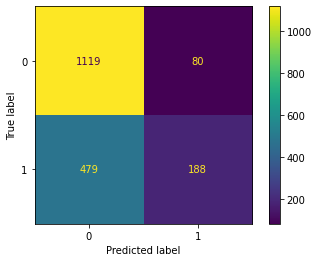

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix ,ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score
result=confusion_matrix(y_pred,y_test)
score=accuracy_score(y_test,y_pred)
cm=ConfusionMatrixDisplay(result)
cm.plot()
print(result)
print(score)


